# 파이썬, OpenCV, scikit-image를 활용한 히스토그램 매칭 
* [PyImageSearch.com](http://www.pyimagesearch.com)

### 이미지 다운로드 

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-color-matching/opencv-color-matching.zip
!unzip -qq opencv-color-matching.zip
%cd opencv-color-matching

--2021-04-26 13:50:10--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-color-matching/opencv-color-matching.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.152.241
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.152.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472183 (461K) [application/zip]
Saving to: ‘opencv-color-matching.zip’

opencv-color-matchi 100%[===================>] 461.12K  2.37MB/s    in 0.2s    

2021-04-26 13:50:11 (2.37 MB/s) - ‘opencv-color-matching.zip’ saved [472183/472183]

/content/opencv-color-matching


## 코드 수행

* 참조 이미지에 있는 색 분포를 입력 이미지에 동일하게 적용하게 되면, 입력이미지는 색깔 분포가 갱신되었음을 알 수 있다.

### 패키지 임포트 

In [2]:
# import the necessary packages
from skimage import exposure
import cv2
import argparse
import matplotlib.pyplot as plt
from IPython.display import Image

### 코랩 및 쥬피터 노트북 수행

In [4]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(image)
    plt.grid(False)
    plt.show()

### OpenCV및 scikit-image를 이용한 히스토그램 매칭 구현

In [6]:
# Argument Parsing
# ap = argparse.ArgumentParser()
# ap.add_argument("-s", "--source", required=True,
# 	help="path to the input source image")
# ap.add_argument("-r", "--reference", required=True,
# 	help="path to the input reference image")
# args = vars(ap.parse_args())

# 코랩 및 쥬피터 노트북에서 수행
args = {
    "source": "empire_state_cloudy.png",
    "reference": "empire_state_sunset.png"
}

[INFO] loading source and reference images...
[INFO] performing histogram matching...


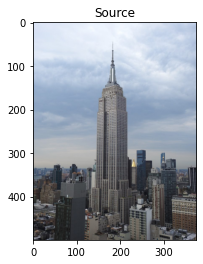

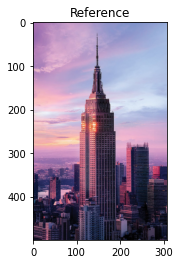

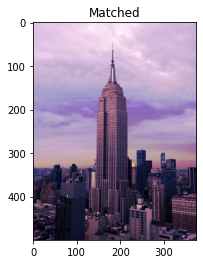

In [7]:
# 1. 소스 및 참조 이미지 로드 
print("[INFO] loading source and reference images...")
src = cv2.imread(args["source"])
ref = cv2.imread(args["reference"])

# multichannle histogram matching을 진행
print("[INFO] performing histogram matching...")
multi = True if src.shape[-1] > 1 else False
matched = exposure.match_histograms(src, ref, multichannel=multi)

# show the output images
plt_imshow("Source", src)
plt_imshow("Reference", ref)
plt_imshow("Matched", matched)

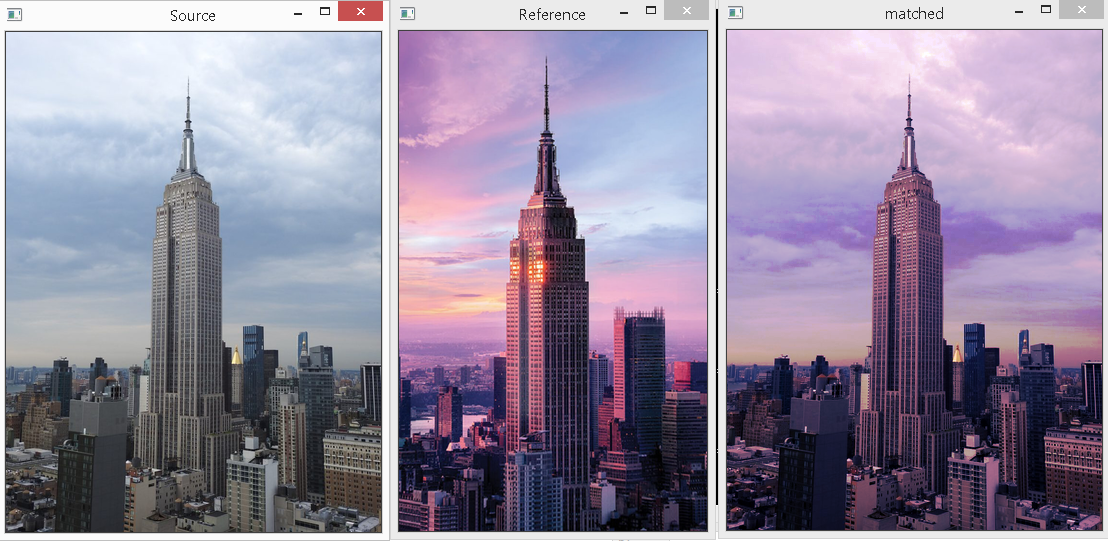

In [ ]:
Image("/content/opencv-color-matching/opencv-color-matching/color_matching.PNG")

In [ ]:
# construct a figure to display the histogram plots for each channel
# before and after histogram matching was applied
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# loop over our source image, reference image, and output matched
# image
for (i, image) in enumerate((src, ref, matched)):
	# convert the image from BGR to RGB channel ordering
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# loop over the names of the channels in RGB order
	for (j, color) in enumerate(("red", "green", "blue")):
		# compute a histogram for the current channel and plot it
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())

		# compute the cumulative distribution function for the
		# current channel and plot it
		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)

		# set the y-axis label of the current plot to be the name
		# of the current color channel
		axs[j, 0].set_ylabel(color)
  
# set the axes titles
axs[0, 0].set_title("Source")
axs[0, 1].set_title("Reference")
axs[0, 2].set_title("Matched")

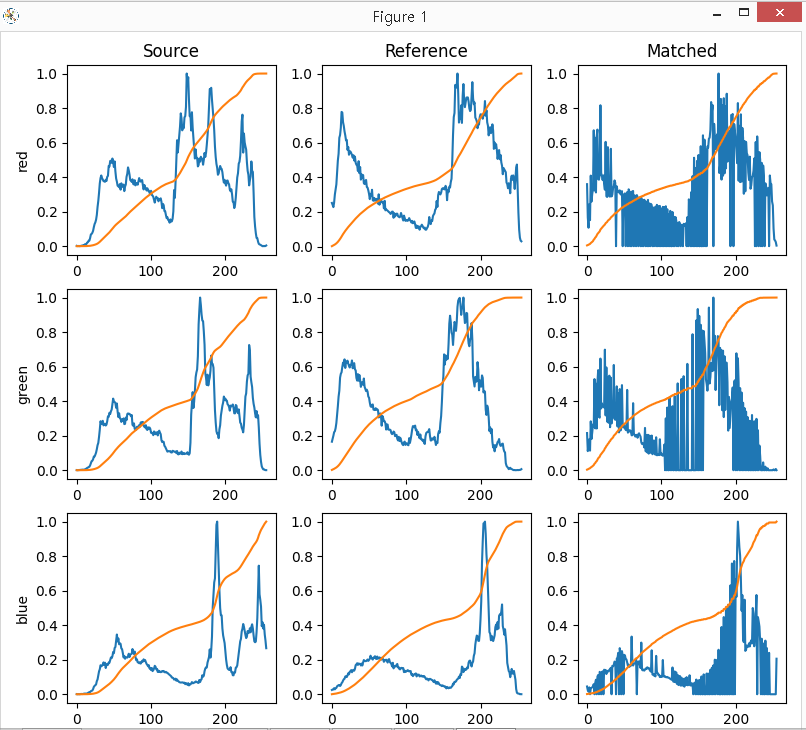

In [3]:
# 각각의 이미지에 따라 RGB채널별 분포도
# Source이미지 - 입력 이미지의 픽셀의 강도 시각화
# Reference - 참조 이미지의 픽셀 강도 시각화
# Matched - 히스토그램 일치방법을 적용 한 후의 분포
Image("/content/opencv-color-matching/result_histogram.PNG")

## 인용
이 튜토리얼의 소스 및 참조 이미지에 사용되는 이미지는  [NewYork YIMBY](https://newyorkyimby.com/2020/09/empire-state-building-restoration-nearly-complete.html) 와 [World Federation Great Tower](https://www.great-towers.com/tower/empire-state-building)의 이미지를 사용하여 히스토그램 매칭을  가르 칠 수있는 특권을 주셔서 감사합니다.

또한 scikit-image 라이브러리의 개발자와 유지 관리자에게 개인적으로 감사드립니다. 내 히스토그램 일치 구현은 [scikit-image 의 공식 예제](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_histogram_matching.html)를 기반